## Facial Recognition using a Convolutional Neural Network

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [34]:
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [189]:
data = sklearn.datasets.fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)

We used sklearn to load the Olivetti faces data-set from AT&T. In this dataset there are 400 images, 40 classes, and ten images per class. A class represents a person. The photos were taken infront of a dark homogenous background. The lighting and facial expressions may vary per person and picture. The resulting images are in grey scale and cropped to 64x64 for easier usage. The dataset has been prepared into four categories, data, images, target, and description. The data (400, 4096) represents a ravelled face image of original size 64 x 64 pixels in each row, reshaped into a vector that can be easily utilized for the CNN model. Each row in images is a face image corresponding to one of the 40 subjects. The target is the true id or label associated with each image, ranging between 0 and 39. We can take a look at all of these below:

In [182]:
data.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [183]:
data.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [184]:
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [7]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [8]:
(data.images[0]).reshape(1,4096)

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [9]:
data.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

As we can see the data portion is the same as images, just reshaped as (400, 4096).

We can take a look at a sample of the images for each person. Below we graph the first image for each unique target id.

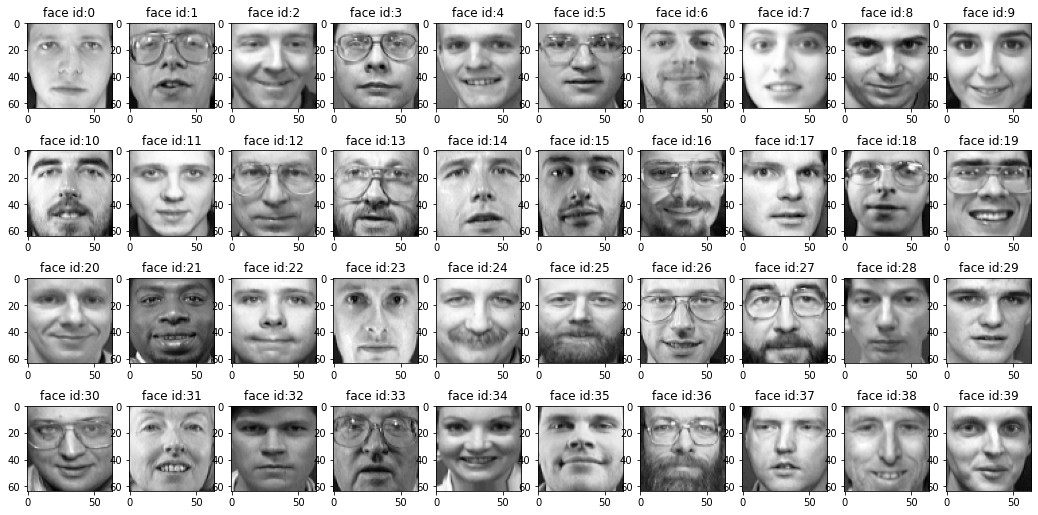

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))

people = list(range(0, len(data.target), 10))

count = 0
for h in range(4):
    for k in range(10):
        ax[h, k].imshow(data.images[people[count]], cmap='gray')
        ax[h, k].set_title("face id:{}".format(count))
        count += 1
fig.show()

We may also be interested in looking at the variation of the 10 images taken for each person. We can do this by looking at all of the photos taken for the first 5 subjects.

In [11]:
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

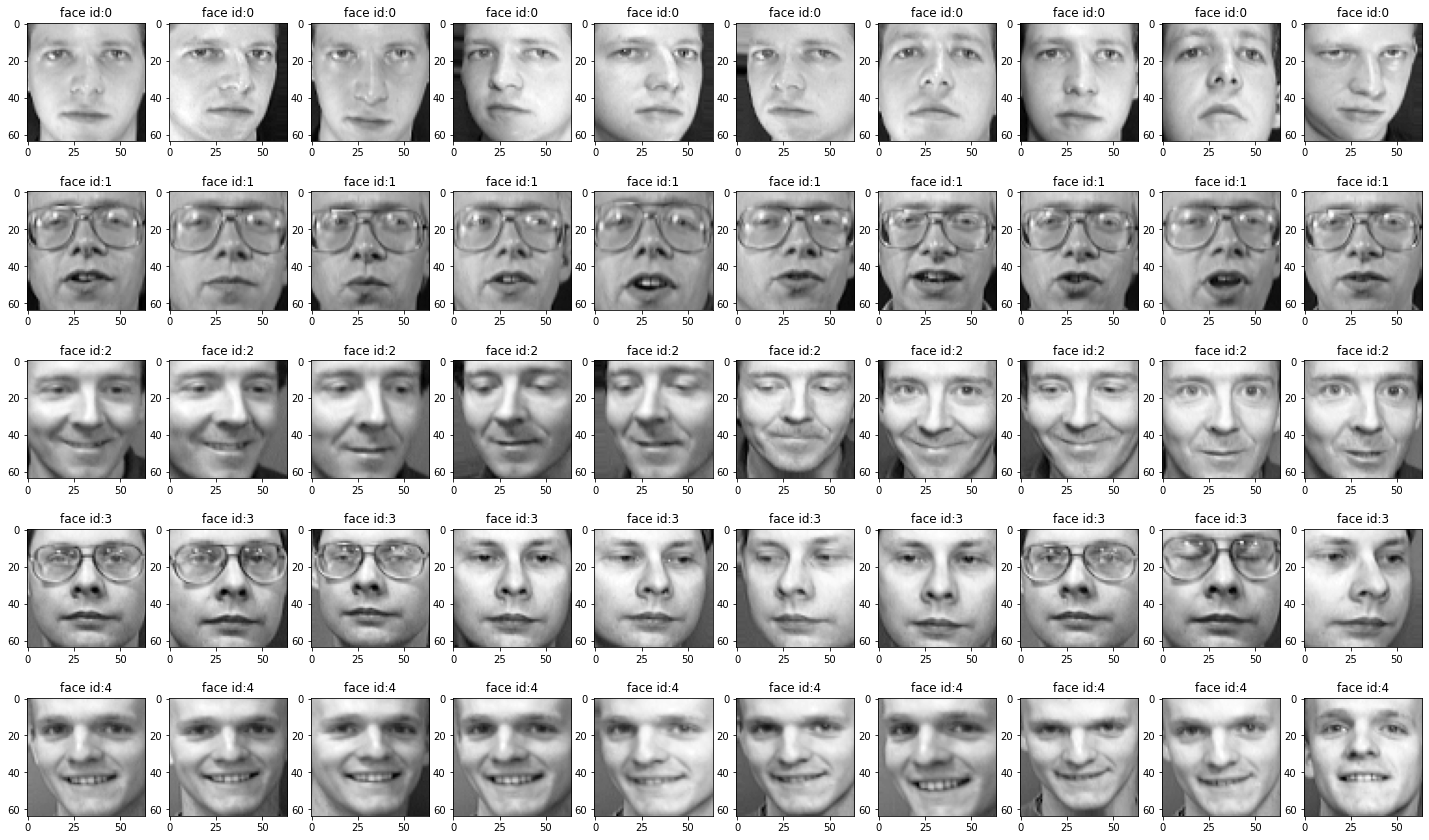

In [12]:
fig2, ax = plt.subplots(nrows=5, ncols=10, figsize=(25, 15))

people = list(range(0, 50))

count = 0
idnum = -1
for h in range(5):
    idnum += 1
    for k in range(10):
        ax[h, k].imshow(data.images[people[count]], cmap='gray')
        ax[h, k].set_title("face id:{}".format(idnum))
        count += 1
fig2.show()

As we can see that there is some variation in the facial expressions, lighting, positioning, and accessories observed for each person. The subject with face id 3, for example, is wearing glasses in only half of the pictures. These glasses appear to be same or similar to the glasses worn by face id 1, which may impact the accuracy of our model. Our CNN model would need to learn to differentiate the two subjects based on their facial features and not just the layout of the picture. 

In [214]:
class OlivettiDataset(Dataset):
    
    def __init__(self, images, targets, transform=None):
        self.images = images
        self.targets = targets
        self.transform = transform
        
    def __len__(self):
        return self.targets.shape[0]
    
    def __getitem__(self, index):
        image = self.images[index]
        label = self.targets[index]
        if self.transform:
            image = self.transform(image)
        return image, label

In [215]:
images = torch.Tensor(data.images)
target = torch.LongTensor(data.target)

In [216]:
transform = transforms.Compose([transforms.ToTensor()])

In [217]:
olivetti = OlivettiDataset(data.images, data.target, transform)

In [218]:
X_train, X_test, y_train, y_test=train_test_split(data.images, data.target, test_size=0.3, stratify=data.target)

print("X_train's shape:",X_train.shape)
print("X_test's shape:",X_test.shape)
print("y_train's shape:",y_train.shape)
print("y_test's shape:",y_train.shape)

X_train's shape: (280, 64, 64)
X_test's shape: (120, 64, 64)
y_train's shape: (280,)
y_test's shape: (280,)


In [219]:
transform(X_train).shape

torch.Size([64, 280, 64])

In [278]:
train_dataset = OlivettiDataset(X_train, y_train)

trainloader = DataLoader(train_dataset, batch_size=4, shuffle=False)

test_dataset = OlivettiDataset(X_test, y_test, transform=transform)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [235]:
for t in trainloader:
    print(t[0].reshape(8,1,64,64))

tensor([[[[0.5000, 0.5372, 0.5289,  ..., 0.5496, 0.5496, 0.5289],
          [0.5083, 0.5248, 0.5248,  ..., 0.5455, 0.5289, 0.5331],
          [0.4959, 0.5124, 0.5248,  ..., 0.5289, 0.5331, 0.5248],
          ...,
          [0.2603, 0.2769, 0.2769,  ..., 0.5289, 0.3306, 0.0455],
          [0.2769, 0.2769, 0.2562,  ..., 0.5041, 0.5785, 0.1364],
          [0.2810, 0.2479, 0.2273,  ..., 0.5207, 0.5992, 0.3843]]],


        [[[0.2479, 0.3471, 0.4669,  ..., 0.5165, 0.4504, 0.3512],
          [0.2190, 0.3182, 0.4752,  ..., 0.5331, 0.4545, 0.3471],
          [0.2066, 0.3017, 0.4545,  ..., 0.5413, 0.4587, 0.3347],
          ...,
          [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198],
          [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198],
          [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198]]],


        [[[0.4545, 0.3678, 0.2397,  ..., 0.4256, 0.4091, 0.4008],
          [0.4545, 0.4008, 0.2769,  ..., 0.4298, 0.4091, 0.3967],
          [0.4463, 0.4339, 0.3140,  ..

In [279]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64*16*16, 128),
            nn.ReLU(),
            nn.Linear(128, 40)  # 40 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [280]:
for i, (images, labels) in enumerate(trainloader):
    print(images)

tensor([[[0.5000, 0.5372, 0.5289,  ..., 0.5496, 0.5496, 0.5289],
         [0.5083, 0.5248, 0.5248,  ..., 0.5455, 0.5289, 0.5331],
         [0.4959, 0.5124, 0.5248,  ..., 0.5289, 0.5331, 0.5248],
         ...,
         [0.2603, 0.2769, 0.2769,  ..., 0.5289, 0.3306, 0.0455],
         [0.2769, 0.2769, 0.2562,  ..., 0.5041, 0.5785, 0.1364],
         [0.2810, 0.2479, 0.2273,  ..., 0.5207, 0.5992, 0.3843]],

        [[0.2479, 0.3471, 0.4669,  ..., 0.5165, 0.4504, 0.3512],
         [0.2190, 0.3182, 0.4752,  ..., 0.5331, 0.4545, 0.3471],
         [0.2066, 0.3017, 0.4545,  ..., 0.5413, 0.4587, 0.3347],
         ...,
         [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198],
         [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198],
         [0.1570, 0.1570, 0.1983,  ..., 0.1116, 0.1240, 0.1198]],

        [[0.4545, 0.3678, 0.2397,  ..., 0.4256, 0.4091, 0.4008],
         [0.4545, 0.4008, 0.2769,  ..., 0.4298, 0.4091, 0.3967],
         [0.4463, 0.4339, 0.3140,  ..., 0.4339, 0.4050, 0.

In [223]:
import torch.optim as optim

In [281]:
# Initialize model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(images.shape[0], 1, images.shape[1], images.shape[2])
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {running_loss/10:.4f}')
            running_loss = 0.0

print('Training finished!')

# Save the trained model
torch.save(model.state_dict(), 'face_classification_model.pth')

Epoch [1/20], Step [10/70], Loss: 3.7547
Epoch [1/20], Step [20/70], Loss: 3.6946
Epoch [1/20], Step [30/70], Loss: 3.7077
Epoch [1/20], Step [40/70], Loss: 3.6875
Epoch [1/20], Step [50/70], Loss: 3.6922
Epoch [1/20], Step [60/70], Loss: 3.6799
Epoch [1/20], Step [70/70], Loss: 3.6839
Epoch [2/20], Step [10/70], Loss: 3.5739
Epoch [2/20], Step [20/70], Loss: 3.5117
Epoch [2/20], Step [30/70], Loss: 3.5768
Epoch [2/20], Step [40/70], Loss: 3.4719
Epoch [2/20], Step [50/70], Loss: 3.2146
Epoch [2/20], Step [60/70], Loss: 3.1144
Epoch [2/20], Step [70/70], Loss: 2.6862
Epoch [3/20], Step [10/70], Loss: 2.4460
Epoch [3/20], Step [20/70], Loss: 2.0379
Epoch [3/20], Step [30/70], Loss: 1.9560
Epoch [3/20], Step [40/70], Loss: 1.8288
Epoch [3/20], Step [50/70], Loss: 1.3569
Epoch [3/20], Step [60/70], Loss: 1.4845
Epoch [3/20], Step [70/70], Loss: 1.0584
Epoch [4/20], Step [10/70], Loss: 1.1090
Epoch [4/20], Step [20/70], Loss: 0.9665
Epoch [4/20], Step [30/70], Loss: 0.7310
Epoch [4/20], St

In [282]:
model.eval()

# Assuming you have a test dataset and dataloader
# Iterate through the test dataset and calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 93.33333333333333%


In [ ]:
#

70 percent of the images will be used for training and 30 percent will be used for testing. We utilized the stratify method in order to obtain an equal amount of training and test images for each subject. With our split, there will be 7 training images and 3 test images for each person.